# Miniproject 1 , ATSC 409

>Angelene Leow, 23162167

### 1(a)(b)(c)(d)
Equation for light intensity: 

$$ I = I_0(1-\beta)(1-\epsilon)e^{-\frac{d}{\alpha}} \\ $$

where $I={\text{light energy}}\\ I_o = {\text{incoming radiative flux}} \\ \beta={\text{ice fraction}} \\ \epsilon={\text{albedo}} \\ \alpha={\text{e-folding length}}$ 

$$\dfrac{\partial I}{\partial d}= - \dfrac{100(1-\beta)(1-\epsilon)}{\alpha}\exp(-\dfrac{d}{\alpha})$$

Equation for temperature profile:
$$\dfrac{\partial T}{\partial t} = \dfrac{\partial }{\partial d}\Big(A_h \dfrac{\partial T}{\partial d}\Big) -\dfrac{1}{C_p}\dfrac{\partial I}{\partial d} $$ 
Expanding the terms using product rule: 
$$\dfrac{\partial T}{\partial t} = A_h \dfrac{\partial^2 T}{\partial d^2} + \dfrac{\partial A_h}{\partial d} \dfrac{\partial T}{\partial d}- \dfrac{1}{C_p}\dfrac{\partial I}{\partial d} \\ $$
At steady state, $\dfrac{\partial T}{\partial t}=0. \\$ 
Hence we rearrange the equation:
$$ A_h \dfrac{\partial^2 T}{\partial d^2} + \dfrac{\partial A_h}{\partial d} \dfrac{\partial T}{\partial d}=\dfrac{1}{C_p}\dfrac{\partial I}{\partial d} \\ \\$$ 

We want to design a sequence of approximations,

$$T_0,T_1, \dots , T_i, \dots,$$ 

defined at a set of depth points,d 

$$d_0<d_1< \dots <d_i< \dots $$

Each $T_i$ is an approximation of the actual temperature at $d_i$ ; that is $$T(d_i) \approx T(i)$$ 

$$d_i = d_0+i\Delta d$$

Since $d_0 = 0, d \approx \Delta d$

We then discretize the terms using Centered Difference Derivative as follows:

$$T^\prime(d_i) \approx \frac{T_{i+1}-T_{i-1}}{2 \Delta d}$$

$$T''(d_i) \approx \frac{T_{i+1}-2T_i+T_{i-1}}{(\Delta d)^2}$$

Replacing both terms back into the temperature profile:
$$ A_h \dfrac{T_{i+1}-2T_i+T_{i-1}}{(\Delta d)^2} + \dfrac{\partial A_h}{\partial d} \dfrac{T_{i+1}-T_{i-1}}{2 \Delta d}=\dfrac{1}{C_p}\dfrac{\partial I_i}{\partial d} \\ \\ $$ 

Multiply both sides by $2(\Delta d)^2$

 $$ 2A_h \Big(T_{i+1}-2T_i+T_{i-1}\Big) + \Delta d  \Big(\dfrac{\partial A_h}{\partial d} T_{i+1}-T_{i-1} \Big)=\dfrac{2(\Delta d)^2}{C_p}\dfrac{\partial I_i}{\partial d} \\ \\ $$ 
 
If we discretize this equation at $N$ discrete points, set $d_i=i\Delta = 1 $,
$i=0,1,\dots,N$, where $d = 1/N$ is the grid spacing, then the ordinary
differential equation can be approximated at a point $d_i$ by the
following system of linear equations:

(Discrete Differential Equation)

$$ 2A_hT_{i-1}-4A_h T_i+\Big( 2A_h +  \frac{\partial A_h}{\partial d}\Big)T_{i+1}  = \dfrac{1}{A_hC_p}\dfrac{\partial I_i}{\partial d} $$

$$ T_{i-1}-2 T_i+\Big(1+\dfrac{1}{2A_h} \dfrac{\partial A_h}{\partial d}\Big)T_{i+1}  = \dfrac{2}{C_p}\dfrac{\partial I_i}{\partial d} $$


##### Boundary conditions: 

$ T\big( d(0)\big) = -1 \space \text{(surface temperature)} $

$ T(\big( d(200)\big) = -2  \space \text{(in water column)}$

for $d<h$, $$A_h = A_{max}$$ $$ \frac{\partial A_{h}}{\partial d} = 0$$ 

for $d>h$,$$A_h = A_{depth}+ \big[ A_{max}-A_{depth}-A_{dip}(d-h) \big] e^{-0.5(d-h)}, \\ \\  \dfrac{\partial A_h}{\partial d} = \big[A_{max}-A_{depth}+A_{dip}h \big] e^{-0.5(d-h)} -0.5\big[ A_{max}-A_{depth}-A_{dip}(d-h) \big] e^{-0.5(d-h)} $$


Let's look at it case by case.

Firstly for $d<h,$ $$T_{i-1}-2 T_i+T_{i+1}  = -\dfrac{2}{C_p} \dfrac{100(1-\beta)(1-\epsilon)}{\alpha}\exp(-\dfrac{d_i}{\alpha}) $$ 

If we write out all of the equations, for the unknown values
$i=1,\dots,N-1$, along with the boundary conditions at $i=0,N$, we
obtain the following set of $N+1$ equations in $N+1$ unknowns:

(Differential System)

for d < 10 
$$\begin{array}{ccccccccccc}
  T_0 & &     & &       & &       &&   &=& -1 \\
  T_0 & -& 2T_1 & + &  T_2  & &         & &     &=& -\dfrac{2}{C_p} \dfrac{100(1-\beta)(1-\epsilon)}{\alpha}\exp(-\dfrac{d_1}{\alpha})\\
      & & T_1 &-& 2 T_2  &+& T_3     & &     &=&  -\dfrac{2}{C_p} \dfrac{100(1-\beta)(1-\epsilon)}{\alpha}\exp(-\dfrac{d_2}{\alpha})\\
      & &     & &       & & \dots   & &     &=& \\
      & &     & &T_{8}&-& 2T_{9}&+& T_{10} &=& f_{9}\\
      & &     & &       & &         & & T_{10} &=& f_{10}  
\end{array}$$

Remember that this system, like any other linear system, can be written
in matrix notation as


(Differential System Matrix)
$$\underbrace{\left[
      \begin{array}{ccccccccc}
        1&  0  & & \dots  & & & & & 0 \\
        1& {-2} & {1} & {0} & {\dots} & && &  \\
        0& {1} & {-2} &  {1} & {0} & {\dots} & & &  \\
        & {0} & {1}  & {-2} & {1} & {0} & {\dots} & &  \\
        & & & & & & & & \\
        \vdots & & & {\ddots} & {\ddots} & {\ddots} & {\ddots} & {\ddots} & \vdots \\
        & & & {\dots} & {0} & {1} & {-2} & {1} & 0 \\
        & &  & &{\dots} & {0} & {1} & {-2} & 1 \\
        0& & & & & \dots & & 0 & 1      
      \end{array}
    \right]
    }_{A_1}
  \underbrace{\left[
      \begin{array}{c}
        T_0 \\ {T_1} \\ {T_2} \\ {T_3} \\ \ \\ {\vdots} \\ \
        \\ {T_{N-2}} \\ {T_{N-1}} \\ T_N
      \end{array}
    \right]
    }_{}
  = 
    \underbrace{\left[
      \begin{array}{c}
        f_0 = -1 \\ {f_1} \\ {f_2} \\ { f_3} \\ \ \\
        {\vdots} \\ \ \\ {f_{N-2}} \\ { f_{N-1}} \\ f_N 
      \end{array}
    \right] 
    }_{F}$$

or, simply $A_1 T = F$.


for $d>h,$ 

$$T_{i-1}-2 T_i+\Big(1+\dfrac{1}{2 \cdot A_{depth}+ \big[ A_{max}-A_{depth}-A_{dip}(d-h) \big] e^{-0.5(d-h)}} \cdot \big[A_{max}-A_{depth}+A_{dip}h \big] e^{-0.5(d-h)} -0.5\big[ A_{max}-A_{depth}-A_{dip}(d-h) \big] e^{-0.5(d-h)} \Big)T_{i+1}  =  -\dfrac{2}{C_p} \dfrac{100(1-\beta)(1-\epsilon)}{\alpha}\exp(-\dfrac{d_i}{\alpha})  $$ 

Near Surface Temperature Maximum (NSTM) =-0.8744941271293623℃ at depth 28 meters below water surface.


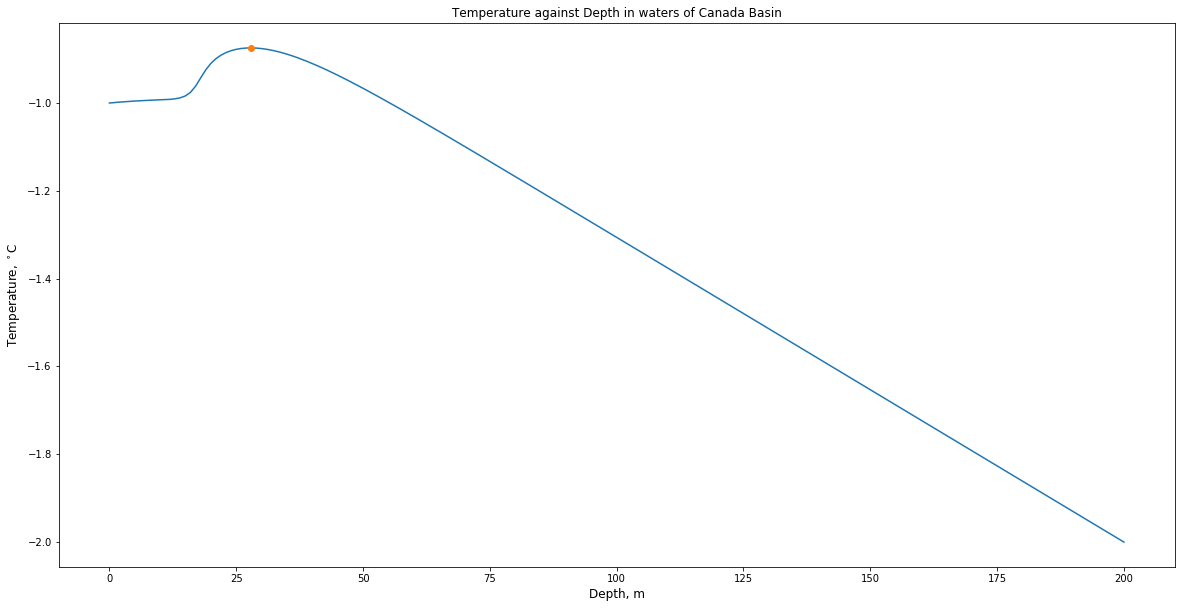

In [171]:
import numpy as np 
from scipy.sparse import diags
from matplotlib import pyplot as plt

# Parameters
Beta = 0.5
I_0 = 100
albedo = 0.1
T_0 = -1
T_200 = -2
alpha = 10
h = 10
c_p = 4e6

A_max = 1e-2
A_depth = 1e-4
A_dip = 1.5e-3


x_0 = 0
x_n = 200
dx = 1
x = np.arange(x_0,x_n+dx,dx)
n = len(x)

dI = -I_0*(1-albedo)*(1-Beta)*np.exp(-x/alpha)/alpha

A_h = A_max*np.ones(np.shape(x))
A_h[x>h] = A_depth+(A_max-A_depth-A_dip*(x[x>h]-h))*np.exp(-0.5*(x[x>h]-h))

dA_h = np.zeros(np.shape(A_h))
dA_h[x>h] = -A_dip*np.exp(-0.5*(x[x>h]-h))-0.5*(A_max-A_depth-A_dip*(x[x>h]-h))*np.exp(-0.5*(x[x>h]-h))

f = dI/c_p
f[0] = T_0
f[-1] = T_200

K1 = ((-1*np.eye(n,k=-1)+np.eye(n,k=1)).T*dA_h).T/(2*dx)
K2 = ((np.eye(n,k=-1)-2*np.eye(n,k=0)+np.eye(n,k=1)).T*A_h).T/(dx**2)

K = K1 + K2
K[0,:] = [1, *np.zeros(n-1)]
K[-1,:] = [*np.zeros(n-1), 1]

T = np.linalg.solve(K,f)
plt.figure(figsize=(20,10))
plt.plot(x,T)
plt.xlabel('Depth, m',fontsize=12)
plt.ylabel('Temperature, $^\circ$C',fontsize=12)
plt.title('Temperature against Depth in waters of Canada Basin')
n_max = T.argmax()
plt.plot(x[n_max],T[n_max],'o')
nstm = max(T)
print('Near Surface Temperature Maximum (NSTM) =' + str(nstm) +'℃ at depth ' +str(n_max) + ' meters below water surface.')
plt.savefig('Temperature against Depth in waters of Canada Basin.png')




NSTM = -0.874 ℃ at depth 28m below water surface. This aligns with the prediction from Jackson et al. where near‐surface temperature maximum (NSTM) at typical depths of 25–35 m has been previously
described.

A seasonal halocline forms in summer once enough sea ice melt has accumulated to separate the
surface mixed layer from the NSTM. The NSTM becomes trapped below the summer
halocline, thereby storing heat from solar radiation. This heat can be stored year‐round in
the Canada Basin if the halocline is strong enough to persist through winter. Hence NSTM layer is located below sea surface level.